# `LogReg confidence for opinion sentences selection` notebook
### Descriprion
Notebook was created to show the difference between classification confidence of models with raw and preprocessed texts given. The final visualization is in the end of the document. 

In [1]:
%cd ../..

/home/pristalovya/Документы/nlp-coursework


In [2]:
from src.nlp.application import Pipeline, get_df_by_film_and_person, get_df_by_person, collect_sents_to_summarize
from datasets_ import DatasetLoader

import dill
from tqdm.notebook import tqdm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

from nltk.tokenize import WhitespaceTokenizer

from razdel.segmenters import tokenize

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib notebook

In [4]:
data = DatasetLoader.load_named_entities_dataset(show_path=True)
data

/home/pristalovya/Документы/nlp-coursework/data/named_entities.csv


,ne,occurrences,film_id,n_sents
0,Кинг,[Несколько лет назад прочитала оригинальный ро...,435,150
1,Дарабонт,[После взросления и прочтения книги фильм Дара...,435,65
2,Перси,[Особенно нелепа вся эта линия с травлей Перси...,435,93
3,Депрессия,"[За то, что работает по блату (во времена Депр...",435,1
4,Делакруа,"[И кстати, ради большей слезовыжималки сценари...",435,26
...,...,...,...,...
106669,Сергей Эйзенштейн,[В качестве наглядного примера могу предложить...,969760,1
106670,Ферруччо,[Молодой Ферруччо - типичный англо-саксонский ...,969760,9
106671,Эдуардо де Филиппо,[Авторам смотреть старые итальянские фильмы и ...,969760,1
106672,Ютюба,[И он по законам мотивашек с Ютюба читает как ...,969760,1


In [29]:
pl = Pipeline('classification', model_type='linear', preprocess=False)

results = []
confs = []

for texts in tqdm(data['occurrences'][:1000]):
    res, conf = pl.classify(texts, return_stat=True)
    results.extend(res)
    confs.extend(conf.tolist())
    
plt.plot(confs, label='raw')
plt.legend()

plt.show()

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


  0%|          | 0/1000 [00:00<?, ?it/s]

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


  0%|          | 0/1000 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


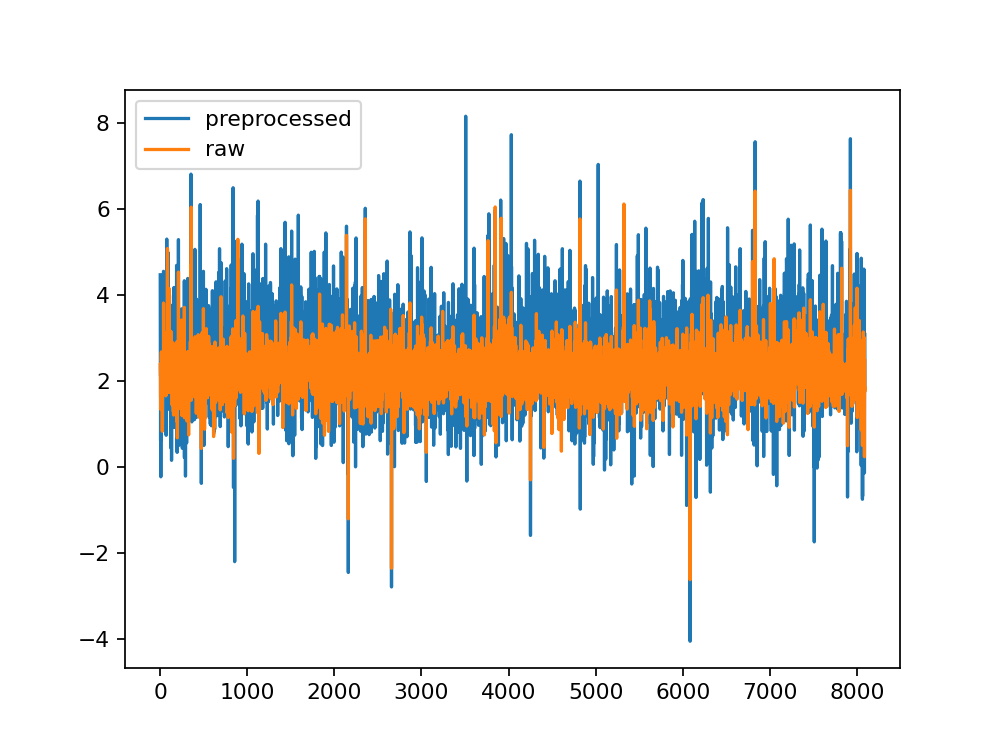

In [28]:
pl = Pipeline('classification', model_type='linear', preprocess=True)

results = []
confs = []

for texts in tqdm(data['occurrences'][:1000]):
    res, conf = pl.classify(pd.Series(texts), return_stat=True)
    results.extend(res)
    confs.extend(conf.tolist())
    
plt.plot(confs, label='preprocessed')
plt.legend()

plt.show()